# Description
## Background and Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.

The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

## Objective

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.

## Data Description

This dataset contains images of unique plants belonging to 12 different species.
The data file names are:
images.npy
Label.csv
Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.
The goal of the project is to create a classifier capable of determining a plant's species from an image.
List of Plant species

Black-grass
Charlock
Cleavers
Common Chickweed
Common Wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed
Shepherds Purse
Small-flowered Cranesbill
Sugar beet

## Scoring guide (Rubric) - Plant Seedlings Classification
### Load dataset and Summary
- Read the dataset properly -Print the overview of the data (shape, checking the proportion of each class) - Plot the images from each class and print their corresponding labels.
3 points
### Perform an Exploratory Data Analysis on the images
- Count Plot for each category - Any other exploratory deep dive
4 points
### Illustrate the insights based on EDA
-Key meaningful observations from EDA
4 points
### Data Pre - Processing
-Try to remove unwanted noise from the images using Gaussian Blurring -Apply the normalization -Plot the images before and after the pre-processing steps -Split the data into train and test
5 points
### Make data compatible
- Convert labels from digits to one hot vector. - Check the shape of the data. Reshape the data into shapes compatible with Keras models, if already not compatible.
5 points
### Model building
- Build Convolution Neural Network - Use different layers in the model
5 points
### Model Performance Improvement
- Comment on model performance - Can model performance be improved? check and comment - Build another model to implement these improvements Model Performance Improvement
5 points
### Model Performance Evaluation
-Evaluate the model on different performance metrics and comment on the performance and scope of improvement. For example precision, recall, accuracy. -Plot confusion matrix for all the models and comment on those.
5 points
### Conclusion and key takeaways
- Final conclusion about the analysis
2 points
### Notebook overall
- Structure and flow - Well commented code
2 points
## Total Points	40

# 1. Loading Libraries and Importing Data

In [1]:
# Importing the standard libraries that may not all be used
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import math
import cv2
import random
import matplotlib.image as mpimg

# Importing all the different Tensorflow and Keras model building tools
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import backend
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

# Importing some sklearn tools that may or may not be used
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer

# Display images using OpenCV
from google.colab.patches import cv2_imshow  

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# For running code in Jupyter Notebook
# Load the image file of the dataset
#images = np.load('images.npy')

# Load the labels file of the dataset
#labels = pd.read_csv('Labels.csv')

In [3]:
# Mount Google drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/P9/images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/P9/Labels.csv')

# 2. Data Overview and EDA

## Data overview and viewing preliminary images.

In [5]:
# looking at the shape of the images and labels
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


#### - There are 4750 images that are 128x128 pixels in 3 colors (most likely RGB)
#### - There are 4750 labels to correspond to the 4750 images.
#### - There are 12 labels per the project statement so I do not think there are going to be many pictures for each type of plant. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

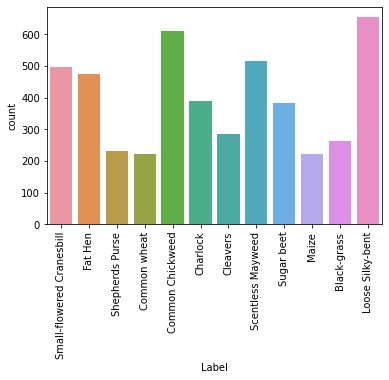

In [6]:
 # Looking at a plot of the picture distrobution and data balance.
 sns.countplot(labels['Label'])
 plt.xticks(rotation='vertical')

#### -  As I feared there are not a lot of pictures for each data type. There are also not an even distrobution of images in each label. 
#### - Some labels only have ~200 images, while others have more then 600.

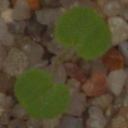

In [7]:
cv2_imshow(images[27])

#### - Image 27 seems to be a green plant on red rocks.

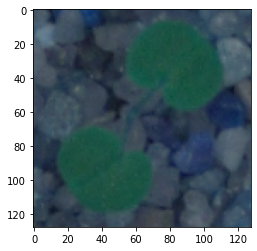

In [8]:
plt.imshow(images[27])

#### - When plotting with mathplotlib the colors are not RGB but BGR. 

In [9]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)


#### - The code run to convert the color will be tested in the next few lines of code to see how the conversion took place.

In [10]:
# Creating a function for plotting a sample of the images. 
def plot_images(images,labels):
  num_classes=10
  categories=np.unique(labels)   
  keys=dict(labels['Label'])
  rows = 5
  cols = 5
  fig = plt.figure(figsize=(28, 28))
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)
          ax.imshow(images[random_index, :])
          ax.set_title(keys[random_index])
  plt.show()

In [11]:
# Plotting a sample of 25 of the images.
plot_images(images,labels)

Output hidden; open in https://colab.research.google.com to view.

#### - Looking at the pictures that are sampled some of the pictures look a bit blurred or out of focus.
#### - Some photos are crisp and can be understood.
#### - Some pictures are hard to discern.

# 3. Data Preprocessing.

## Decreasing the image size to save on computational resources.

In [12]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)  
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

#### - The image sizes are decreased from 128,128,3 to 64,64,3.

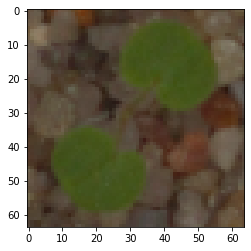

In [13]:
plt.imshow(images_decreased[27])

#### - I will return to this response after running some CNN algorithms.

## Trying Gaussian Blurring

In [14]:
# Writing a function to add Gaussian Bluring to the images
images_gb=[]
for i in range(len(images_decreased)):
  images_gb.append(cv2.GaussianBlur(images_decreased[i], ksize =(15,15),sigmaX =  0))

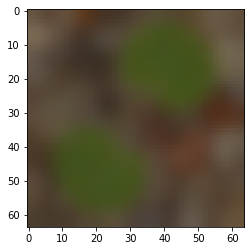

In [15]:
plt.imshow(images_gb[27])

#### - I feel like with the images already showing some blur and with some of the images not having much information, the blurring might be detrimental. On the other hand there are some images with excessive noise so this may help.

## Increasing the brightness of the stock images as some were dark and hard to discern.

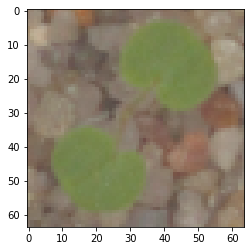

In [16]:
# Applying Brightening to help clarify some of the images.
images_bt=[]
for i in range(len(images_decreased)):
  images_bt.append(cv2.convertScaleAbs(images_decreased[i], alpha=1 ,beta=50 ))

plt.imshow(images_bt[27])



#### - I think this will help with some of the darker pictures. I chose a beta of 50 because after playing with the alpha and beta settings 50 brightened the picture without washing it out.

## The following a a composite of the same image after different transformations.


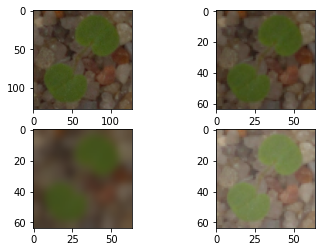

In [17]:
img1 = images[27]
img2 = images_decreased[27]
img3 = images_gb[27]
img4 = images_bt[27]

plt.figure(1)
plt.subplot(221)
plt.imshow(img1)

plt.subplot(222)
plt.imshow(img2)

plt.subplot(223)
plt.imshow(img3)

plt.subplot(224)
plt.imshow(img4)

plt.show()


#### - I will move ahead with the decreased images, gaussian blurred images, and brightened images in my models. I will train all three image groups to see how the results pan out. 

# 4) Splitting the Datasets, Encoding the Data, and Data Normalization

## Decreased Size Image Dataset

In [18]:
X_train, X_test, y_train, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)

In [19]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(4275, 64, 64, 3) (4275, 1)
(475, 64, 64, 3) (475, 1)


In [20]:
# Converting Label names using LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_test_encoded=enc.transform(y_test)

In [21]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Gaussian Blurred Image Dataset

In [22]:
X_traingb, X_testgb, y_traingb, y_testgb = train_test_split(np.array(images_gb),labels , test_size=0.1, random_state=42,stratify=labels)

In [23]:
print(X_traingb.shape,y_traingb.shape)
print(X_testgb.shape,y_testgb.shape)

(4275, 64, 64, 3) (4275, 1)
(475, 64, 64, 3) (475, 1)


In [24]:
# Converting Label names using LabelBinarizer
enc = LabelBinarizer()
y_traingb_encoded = enc.fit_transform(y_traingb)
y_testgb_encoded=enc.transform(y_testgb)

In [25]:
# Normalizing the image pixels
X_traingb_normalized = X_traingb.astype('float32')/255.0
X_testgb_normalized = X_testgb.astype('float32')/255.0

## Increased Brightness Image Dataset

In [26]:
X_trainbt, X_testbt, y_trainbt, y_testbt = train_test_split(np.array(images_bt),labels , test_size=0.1, random_state=42,stratify=labels)

In [27]:
print(X_trainbt.shape,y_trainbt.shape)
print(X_testbt.shape,y_testbt.shape)

(4275, 64, 64, 3) (4275, 1)
(475, 64, 64, 3) (475, 1)


In [28]:
# Converting Label names using LabelBinarizer
enc = LabelBinarizer()
y_trainbt_encoded = enc.fit_transform(y_trainbt)
y_testbt_encoded=enc.transform(y_testbt)

In [29]:
# Normalizing the image pixels
X_trainbt_normalized = X_trainbt.astype('float32')/255.0
X_testbt_normalized = X_testbt.astype('float32')/255.0

# 5) Model Building

## Building a baseline model.

In [112]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(27)
random.seed(27)
tf.random.set_seed(27)

In [113]:
# Intializing a sequential model
model_1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
model_1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model_1.add(MaxPooling2D((2, 2), padding = 'same'))
model_1.add(BatchNormalization())

# Input_shape denotes input image dimension of MNIST images
model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))

# Adding max pooling to reduce the size of output of first conv layer
model_1.add(MaxPooling2D((2, 2), padding = 'same'))
model_1.add(BatchNormalization())


# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_1.add(Flatten())

# Adding a fully connected dense layer with 64 neurons    
model_1.add(Dense(64, activation='relu'))

# Adding a fully connected dense layer with 32 neurons    
model_1.add(Dense(32, activation='relu'))

# Adding a fully connected dense layer with 16 neurons    
model_1.add(Dense(16, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model_1.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()


In [114]:
# Generating the summary of the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                        

In [115]:
# Compile model
model_1.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

## Training model_1 on the Reduced Size Image Dataset

In [116]:
history_1 = model_1.fit(
            X_train_normalized, y_train_encoded,
            epochs=20,
            validation_split=0.1,
            batch_size=32,
)

Epoch 1/20
121/121 [==============================] - 3s 20ms/step - loss: 1.8810 - accuracy: 0.3634 - val_loss: 5.0098 - val_accuracy: 0.0491
Epoch 2/20
121/121 [==============================] - 2s 16ms/step - loss: 1.1423 - accuracy: 0.6137 - val_loss: 9.4822 - val_accuracy: 0.0421
Epoch 3/20
121/121 [==============================] - 2s 16ms/step - loss: 0.7544 - accuracy: 0.7505 - val_loss: 6.9980 - val_accuracy: 0.1238
Epoch 4/20
121/121 [==============================] - 2s 16ms/step - loss: 0.5177 - accuracy: 0.8225 - val_loss: 4.4551 - val_accuracy: 0.1799
Epoch 5/20
121/121 [==============================] - 2s 16ms/step - loss: 0.3436 - accuracy: 0.8874 - val_loss: 1.7061 - val_accuracy: 0.4813
Epoch 6/20
121/121 [==============================] - 2s 16ms/step - loss: 0.2260 - accuracy: 0.9272 - val_loss: 3.0189 - val_accuracy: 0.4206
Epoch 7/20
121/121 [==============================] - 2s 16ms/step - loss: 0.1885 - accuracy: 0.9371 - val_loss: 2.4814 - val_accuracy: 0.4766

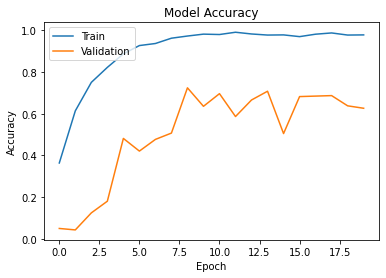

In [117]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### - After 20 Epochs the data is clearly overfit.

In [118]:
accuracy = model_1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 2.2325 - accuracy: 0.6232 - 114ms/epoch - 8ms/step


#### - Accuracy of 62% is low but it is a starting point.

In [99]:
# Here we would get the output as probablities for each category
y_pred=model_1.predict(X_test_normalized)

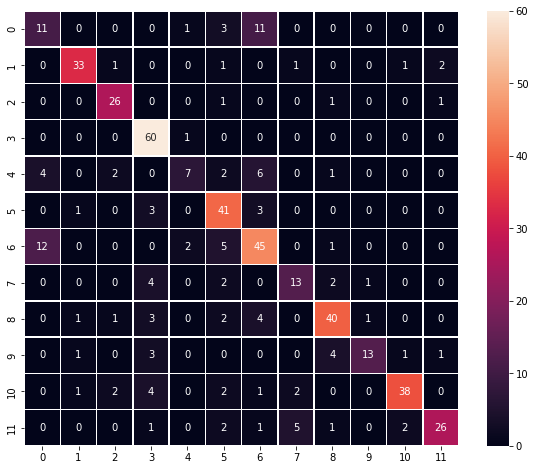

In [100]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

#### - The reduced size images did not train well on model_1.
#### - Type 4 had the worst results.

## Training model_1 on the Gaussian Blurred Image Dataset

In [119]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(27)
random.seed(27)
tf.random.set_seed(27)

In [122]:
history_2 = model_1.fit(
            X_traingb_normalized, y_traingb_encoded,
            epochs=20,
            validation_split=0.1,
            batch_size=32,
)

Epoch 1/20
121/121 [==============================] - 3s 25ms/step - loss: 0.2329 - accuracy: 0.9186 - val_loss: 2.4273 - val_accuracy: 0.5537
Epoch 2/20
121/121 [==============================] - 3s 24ms/step - loss: 0.1027 - accuracy: 0.9620 - val_loss: 1.2158 - val_accuracy: 0.7336
Epoch 3/20
121/121 [==============================] - 3s 22ms/step - loss: 0.0774 - accuracy: 0.9745 - val_loss: 1.4793 - val_accuracy: 0.7103
Epoch 4/20
121/121 [==============================] - 3s 21ms/step - loss: 0.0612 - accuracy: 0.9797 - val_loss: 2.8504 - val_accuracy: 0.5818
Epoch 5/20
121/121 [==============================] - 3s 25ms/step - loss: 0.0618 - accuracy: 0.9810 - val_loss: 1.7741 - val_accuracy: 0.6682
Epoch 6/20
121/121 [==============================] - 2s 17ms/step - loss: 0.0513 - accuracy: 0.9834 - val_loss: 4.2662 - val_accuracy: 0.5000
Epoch 7/20
121/121 [==============================] - 2s 16ms/step - loss: 0.0494 - accuracy: 0.9841 - val_loss: 4.0220 - val_accuracy: 0.5514

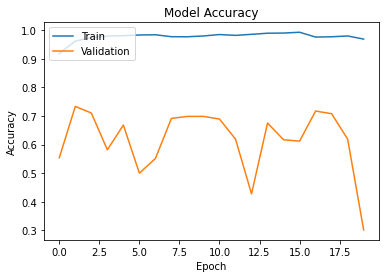

In [123]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### - The Gaussian Blurred Images was very overfit on model_1.

In [124]:
accuracy = model_1.evaluate(X_testgb_normalized, y_testgb_encoded, verbose=2)

15/15 - 0s - loss: 8.1110 - accuracy: 0.3411 - 133ms/epoch - 9ms/step


#### - Accuracy was terrible at 34%.

In [125]:
# Here we would get the output as probablities for each category
y_predgb=model_1.predict(X_testgb_normalized)

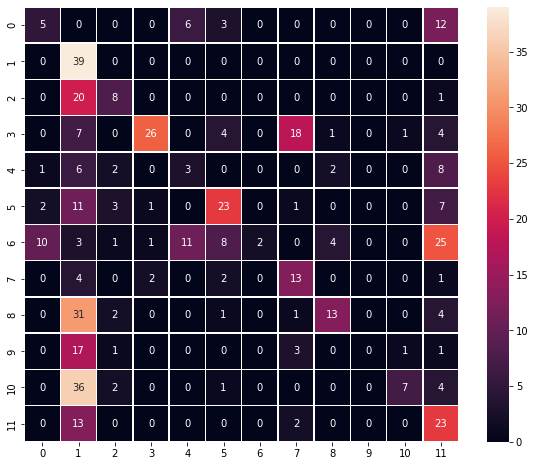

In [126]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_predgb_arg=np.argmax(y_predgb,axis=1)
y_testgb_arg=np.argmax(y_testgb_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_testgb_arg,y_predgb_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

#### - Gaussian Blurring made the model look much worse.


## Training model_1 on the Increased Brightness Image Dataset

In [127]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(27)
random.seed(27)
tf.random.set_seed(27)

In [129]:
history_3 = model_1.fit(
            X_trainbt_normalized, y_trainbt_encoded,
            epochs=20,
            validation_split=0.1,
            batch_size=32,
)

Epoch 1/20
121/121 [==============================] - 3s 22ms/step - loss: 0.0141 - accuracy: 0.9966 - val_loss: 1.5184 - val_accuracy: 0.7407
Epoch 2/20
121/121 [==============================] - 3s 22ms/step - loss: 0.0048 - accuracy: 0.9997 - val_loss: 2.2919 - val_accuracy: 0.6425
Epoch 3/20
121/121 [==============================] - 3s 22ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 1.4637 - val_accuracy: 0.7593
Epoch 4/20
121/121 [==============================] - 3s 21ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 1.6977 - val_accuracy: 0.7687
Epoch 5/20
121/121 [==============================] - 3s 24ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 1.4800 - val_accuracy: 0.7664
Epoch 6/20
121/121 [==============================] - 2s 17ms/step - loss: 7.9125e-04 - accuracy: 1.0000 - val_loss: 1.5506 - val_accuracy: 0.7687
Epoch 7/20
121/121 [==============================] - 2s 16ms/step - loss: 6.8569e-04 - accuracy: 1.0000 - val_loss: 1.5027 - val_accuracy

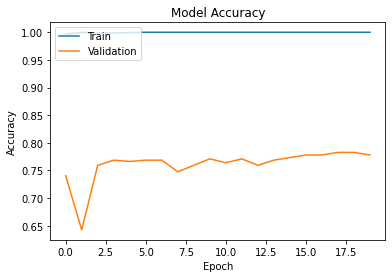

In [130]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### - Model_1 is still overfit.

In [131]:
accuracy = model_1.evaluate(X_testbt_normalized, y_testbt_encoded, verbose=2)

15/15 - 0s - loss: 1.5602 - accuracy: 0.7832 - 128ms/epoch - 9ms/step


#### - Accuracy is higher then the previous 2 builds at 78%.

In [134]:
# Here we would get the output as probablities for each category
y_predbt=model_1.predict(X_testbt_normalized)

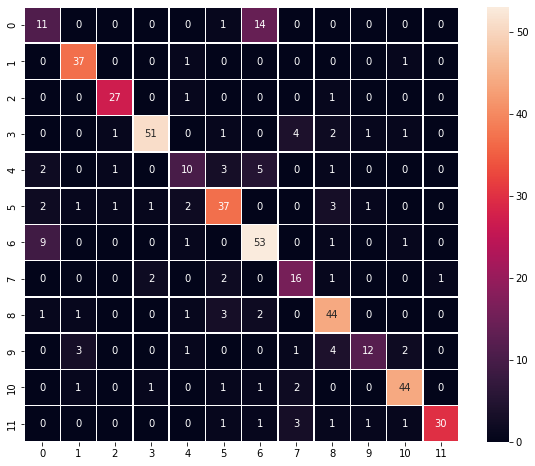

In [135]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_predbt_arg=np.argmax(y_predbt,axis=1)
y_testbt_arg=np.argmax(y_testbt_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_testbt_arg,y_predbt_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

#### - Model_1 needs improvement. 
#### - Gaussian Blurring tanked on this model.
#### - Moving forward I will try to improve model_1 but stick to the Increased Brightness Image Dataset as it had the best results with the baseline model.

## Model 2 - Adding improvements to Model_1

In [167]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(27)
random.seed(27)
tf.random.set_seed(27)


#### - Adding dropout to the first dense layer.

In [168]:
# Intializing a sequential model
model_2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model_2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D((2, 2), padding = 'same'))
model_2.add(BatchNormalization())

# Input_shape denotes input image dimension of MNIST images
model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D((2, 2), padding = 'same'))
model_2.add(BatchNormalization())


# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_2.add(Flatten())

# Adding a fully connected dense layer with 64 neurons    
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.25))

# Adding a fully connected dense layer with 32 neurons    
model_2.add(Dense(32, activation='relu'))

# Adding a fully connected dense layer with 16 neurons    
model_2.add(Dense(16, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model_2.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()


In [169]:
# Generating the summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                        

In [170]:
# Compile model
model_2.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

In [171]:
history_4 = model_2.fit(
            X_trainbt_normalized, y_trainbt_encoded,
            epochs=10,
            validation_split=0.1,
            batch_size=32,
)

Epoch 1/10
121/121 [==============================] - 3s 20ms/step - loss: 2.1133 - accuracy: 0.2714 - val_loss: 2.8153 - val_accuracy: 0.1238
Epoch 2/10
121/121 [==============================] - 2s 16ms/step - loss: 1.5856 - accuracy: 0.4383 - val_loss: 4.6535 - val_accuracy: 0.1215
Epoch 3/10
121/121 [==============================] - 2s 16ms/step - loss: 1.2287 - accuracy: 0.5794 - val_loss: 6.1258 - val_accuracy: 0.1262
Epoch 4/10
121/121 [==============================] - 2s 16ms/step - loss: 1.0207 - accuracy: 0.6545 - val_loss: 1.8325 - val_accuracy: 0.3294
Epoch 5/10
121/121 [==============================] - 2s 16ms/step - loss: 0.8659 - accuracy: 0.7029 - val_loss: 2.2549 - val_accuracy: 0.3668
Epoch 6/10
121/121 [==============================] - 2s 16ms/step - loss: 0.7181 - accuracy: 0.7479 - val_loss: 2.1683 - val_accuracy: 0.3902
Epoch 7/10
121/121 [==============================] - 2s 16ms/step - loss: 0.5984 - accuracy: 0.7913 - val_loss: 1.6092 - val_accuracy: 0.5304

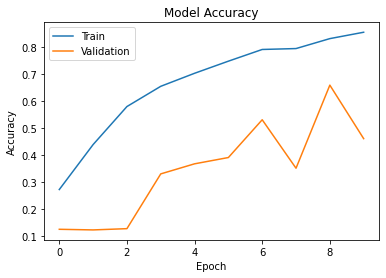

In [172]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### - This model performed terribly.

In [173]:
accuracy = model_2.evaluate(X_testbt_normalized, y_testbt_encoded, verbose=2)

15/15 - 0s - loss: 2.9342 - accuracy: 0.4547 - 117ms/epoch - 8ms/step


#### - Accuracy of 45% is not good, the dropout did not help.

In [176]:
# Here we would get the output as probablities for each category
y_pred2=model_2.predict(X_testbt_normalized)

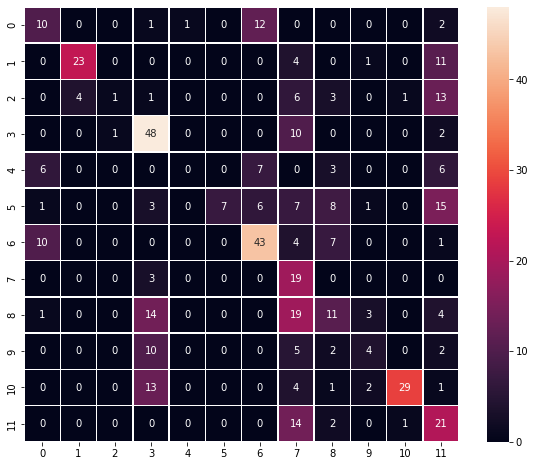

In [177]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg2=np.argmax(y_pred2,axis=1)
y_test_arg2=np.argmax(y_testbt_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg2,y_pred_arg2)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

#### - Adding dropout did not help the model. I will have to try something else.
#### - I think that due to the low number of instances found earlier, I my benefit from Data Augmentation.

## Model_3 Adding Data Augmentation to Model_1

In [190]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(27)
random.seed(27)
tf.random.set_seed(27)

In [191]:
# Adding Data Augmentation to the dataset
train_datagen = ImageDataGenerator(
                              horizontal_flip = True,
                              vertical_flip = True, 
                              height_shift_range= 0.1, 
                              width_shift_range=0.1, 
                              rotation_range=20, 
                              shear_range = 0.1,
                              zoom_range=0.1)


In [192]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

history = model_1.fit(train_datagen.flow(X_trainbt_normalized,y_trainbt_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_trainbt_normalized.shape[0] // batch_size,
                    validation_data=(X_testbt_normalized,y_testbt_encoded),
                    verbose=1)

Epoch 1/25
66/66 [==============================] - 7s 110ms/step - loss: 0.3277 - accuracy: 0.8841 - val_loss: 0.8888 - val_accuracy: 0.7684
Epoch 2/25
66/66 [==============================] - 7s 107ms/step - loss: 0.3043 - accuracy: 0.8905 - val_loss: 1.4462 - val_accuracy: 0.6589
Epoch 3/25
66/66 [==============================] - 7s 108ms/step - loss: 0.2759 - accuracy: 0.9043 - val_loss: 2.9202 - val_accuracy: 0.5011
Epoch 4/25
66/66 [==============================] - 7s 106ms/step - loss: 0.2717 - accuracy: 0.9014 - val_loss: 1.3963 - val_accuracy: 0.6800
Epoch 5/25
66/66 [==============================] - 7s 106ms/step - loss: 0.2595 - accuracy: 0.9052 - val_loss: 2.6202 - val_accuracy: 0.5389
Epoch 6/25
66/66 [==============================] - 7s 106ms/step - loss: 0.2418 - accuracy: 0.9093 - val_loss: 0.5702 - val_accuracy: 0.8526
Epoch 7/25
66/66 [==============================] - 7s 107ms/step - loss: 0.2550 - accuracy: 0.9090 - val_loss: 2.1740 - val_accuracy: 0.5621
Epoch 

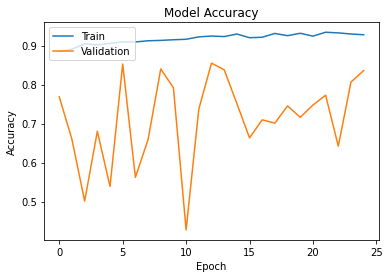

In [193]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### - Validation accuracy is still all over the place, but model_1 seems to be better.

In [194]:
accuracy = model_1.evaluate(X_testbt_normalized, y_testbt_encoded, verbose=2)

15/15 - 0s - loss: 0.6707 - accuracy: 0.8358 - 175ms/epoch - 12ms/step


#### - 83.5% is a definite improvement on model_1.

In [195]:
# Here we would get the output as probablities for each category
y_predbt1=model_1.predict(X_testbt_normalized)

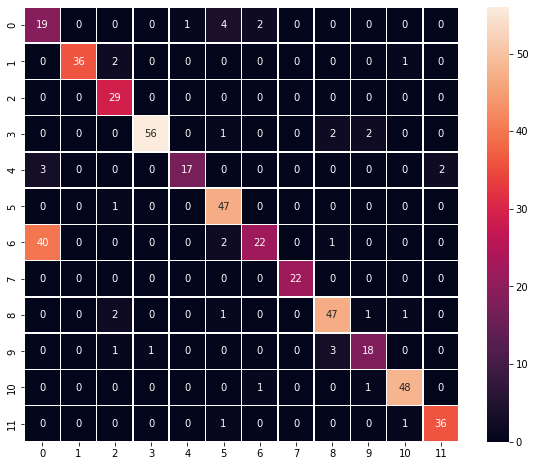

In [196]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_predbt1,axis=1)
y_test_arg=np.argmax(y_testbt_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

#### - The only issue with this model is that Type 0 was often predicted as Type 6.
#### - The Data Augmentation added to the model. 
#### - To get even better results I will try using transfer learning.

## Transfer Learning with VGG16

In [224]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(27)
random.seed(27)
tf.random.set_seed(27)

In [225]:
vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [226]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [227]:
# Verifying the layers are non-trainable
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [228]:
tl_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
tl_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
tl_model.add(Flatten())

# Adding the Fully Connnected Layers from model_1
# Adding a fully connected dense layer with 64 neurons    
tl_model.add(Dense(64, activation='relu'))

# Adding a fully connected dense layer with 32 neurons    
tl_model.add(Dense(32, activation='relu'))

# Adding a fully connected dense layer with 16 neurons    
tl_model.add(Dense(16, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
tl_model.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model
tl_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
tl_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 12)                204       
                                                                 
Total params: 14,848,636
Trainable params: 133,948
Non-t

In [229]:
# Compile model
tl_model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

In [230]:
history_5 = tl_model.fit(train_datagen.flow(X_trainbt_normalized,y_trainbt_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_trainbt_normalized.shape[0] // batch_size,
                    validation_data=(X_testbt_normalized,y_testbt_encoded),
                    verbose=1)

Epoch 1/25
66/66 [==============================] - 11s 138ms/step - loss: 2.3083 - accuracy: 0.1774 - val_loss: 2.0775 - val_accuracy: 0.2632
Epoch 2/25
66/66 [==============================] - 8s 123ms/step - loss: 1.9544 - accuracy: 0.3246 - val_loss: 1.8873 - val_accuracy: 0.3453
Epoch 3/25
66/66 [==============================] - 8s 121ms/step - loss: 1.7579 - accuracy: 0.3745 - val_loss: 1.7135 - val_accuracy: 0.4042
Epoch 4/25
66/66 [==============================] - 8s 122ms/step - loss: 1.6299 - accuracy: 0.4244 - val_loss: 1.6064 - val_accuracy: 0.4295
Epoch 5/25
66/66 [==============================] - 8s 122ms/step - loss: 1.5477 - accuracy: 0.4593 - val_loss: 1.5252 - val_accuracy: 0.4589
Epoch 6/25
66/66 [==============================] - 8s 121ms/step - loss: 1.4805 - accuracy: 0.4773 - val_loss: 1.4723 - val_accuracy: 0.4737
Epoch 7/25
66/66 [==============================] - 8s 121ms/step - loss: 1.4121 - accuracy: 0.5039 - val_loss: 1.4315 - val_accuracy: 0.5032
Epoch

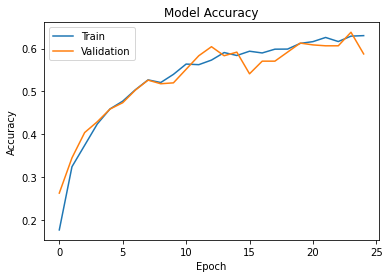

In [231]:
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### - The train and validation grew together but the accuracy was quite low. 

In [232]:
accuracy = tl_model.evaluate(X_testbt_normalized, y_testbt_encoded, verbose=2)

15/15 - 1s - loss: 1.2134 - accuracy: 0.5874 - 532ms/epoch - 35ms/step


#### - The accuracy was only 58% which is well below the previous model.

In [233]:
# Here we would get the output as probablities for each category
y_predtl=tl_model.predict(X_testbt_normalized)

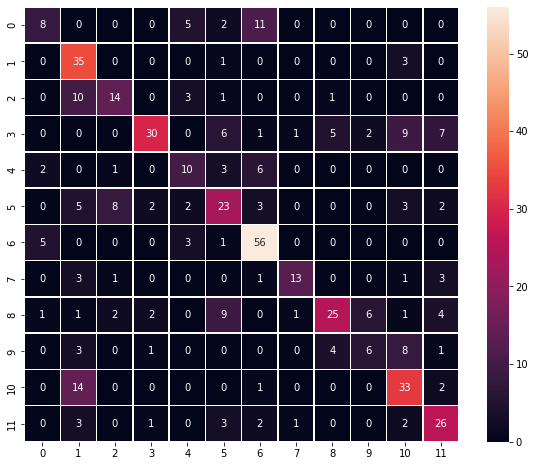

In [234]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_predtl,axis=1)
y_test_arg=np.argmax(y_testbt_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

#### - The VGG16 model was not able to generalize the plant seedling data very well.

# 6) Conclussions

## Looking at some of the photos and how they were labeled vs their predicted label.

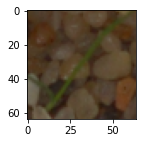

Predicted Label ['Loose Silky-bent']
True Label Loose Silky-bent


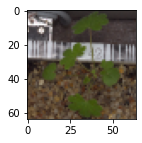

Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


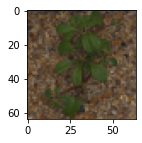

Predicted Label ['Cleavers']
True Label Cleavers


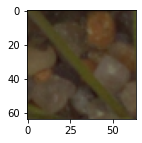

Predicted Label ['Loose Silky-bent']
True Label Small-flowered Cranesbill


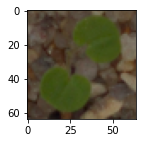

Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


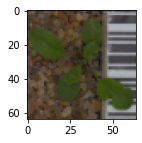

Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [240]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[27])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_testbt_normalized[27].reshape(1,64,64,3)))))   
print('True Label', enc.inverse_transform(y_testbt_encoded)[27])  

plt.figure(figsize=(2,2))
plt.imshow(X_test[69])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_testbt_normalized[69].reshape(1,64,64,3)))))  
print('True Label', enc.inverse_transform(y_testbt_encoded)[69])   

plt.figure(figsize=(2,2))
plt.imshow(X_test[222])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_testbt_normalized[222].reshape(1,64,64,3)))))  
print('True Label', enc.inverse_transform(y_testbt_encoded)[222])  

plt.figure(figsize=(2,2))
plt.imshow(X_test[333])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_testbt_normalized[333].reshape(1,64,64,3)))))  
print('True Label', enc.inverse_transform(y_testbt_encoded)[333])  

plt.figure(figsize=(2,2))
plt.imshow(X_test[420],)
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_testbt_normalized[420].reshape(1,64,64,3)))))  
print('True Label', enc.inverse_transform(y_testbt_encoded)[420])    

plt.figure(figsize=(2,2))
plt.imshow(X_test[-1])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_testbt_normalized[-1].reshape(1,64,64,3)))))  
print('True Label', enc.inverse_transform(y_testbt_encoded)[-1])

In [243]:
pd.DataFrame({'Models':['Model_1 w/ Reduced Size Images Dataset','Model_1 w/ Gaussian Blurred Images Dataset','Model_1 w/ Increased Brightness Image Dataset', 'Model_2 w/ Increased Brightness Image Dataset', 'Model_3 w/ Increased Brightness Image Dataset', 'VGG Model w/ Increased Brightness Image Dataset' ],'Test Accuracy':['62.3%','34.1%','78.3%','45.5%','83.6%','58.7%']})

,Models,Test Accuracy
0,Model_1 w/ Reduced Size Images Dataset,62.3%
1,Model_1 w/ Gaussian Blurred Images Dataset,34.1%
2,Model_1 w/ Increased Brightness Image Dataset,78.3%
3,Model_2 w/ Increased Brightness Image Dataset,45.5%
4,Model_3 w/ Increased Brightness Image Dataset,83.6%
5,VGG Model w/ Increased Brightness Image Dataset,58.7%


## - The best model used was model_3 (or) model_1 with the Increased Brightness Images Dataset and Data Augmentation.
## - The model was able to properly predict the plant seedling type with 83.6% accuracy.
## - The biggest issue was that there were 40 misclassifications of Type 0 as Type 6.
## - Further tuning of the Dataset would be required to improve the outcome. Perhaps focusing on Type 0.